# Lito - Case

<img align="left" width="80" height="200" src="https://img.shields.io/badge/python-v3.6-blue.svg">
<br>

## Table of contents

1. [Import Data](#Import-Data)
2. [Problem Statement](#Problem-Statement)
3. [Import-Data](#Import-Data)
4. [Data Cleaning](#Data--Cleaning)
5. [Data Exploration](#Data-Exploration)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
import seaborn as sns
import itertools, math, warnings


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(color_codes=True)
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
%matplotlib inline
%autosave 30

Autosaving every 30 seconds


In [2]:
PATH = 'orders-6-months-clean.csv'
df = pd.read_csv(PATH)
df.head()
df.tail()
print('(number of observations, number of features) =', df.shape)

,Origin,Sequence,Creation Date,Client Document,State,City,Neighborhood,Carrier,Delivery Deadline,Status,Utmi,Payment System Name,Installments,ID_SKU,Category Ids Sku,SKU Value,SKU Selling Price,SKU Total Price,Shipping List Price,Shipping Value,Total Value,Discounts Totals
0,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
1,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0
2,B2C Channel,614746,2018-02-28 02:09:26Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
3,B2C Channel,614746,2018-02-28 02:09:26Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0
4,B2C Channel,614749,2018-02-28 02:26:18Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0


,Origin,Sequence,Creation Date,Client Document,State,City,Neighborhood,Carrier,Delivery Deadline,Status,Utmi,Payment System Name,Installments,ID_SKU,Category Ids Sku,SKU Value,SKU Selling Price,SKU Total Price,Shipping List Price,Shipping Value,Total Value,Discounts Totals
18908,B2C Channel,658033,2018-08-30 19:05:09Z,10619214767,RJ,Duque de Caxias,Centro,Retirada em Loja (188537b),6bd,Ready for shipping,cpc - google - - brand136193,/1/11/,25,0,25,0,0,0,-50.00,NaN,NaN,NaN
18909,B2C Channel,658033,2018-08-30 19:05:09Z,10619214767,RJ,Duque de Caxias,Centro,Retirada em Loja (188537b),6bd,Ready for shipping,cpc - google - - brand120269,/1/11/,25,0,25,0,0,0,-50.00,NaN,NaN,NaN
18910,B2C Channel,658042,2018-08-30 19:50:37Z,8570203748,RJ,Teres�polis,V�rzea,Transportadora,8bd,Payment pending,cpc - google - - brand,Mastercard,4,131834,/3/35/,199,199,199,26.58,26.58,225.58,0.0
18911,B2C Channel,658045,2018-08-30 19:55:28Z,15506641745,RJ,Rio de Janeiro,Botafogo,Retirada em Loja (18fd71a),6bd,Payment pending,- - -,Mastercard,5,131837,/3/35/,199,199,199,0.00,0.00,358.00,0.0
18912,B2C Channel,658045,2018-08-30 19:55:28Z,15506641745,RJ,Rio de Janeiro,Botafogo,Retirada em Loja (18fd71a),6bd,Payment pending,- - -,Mastercard,5,131434,/3/,159,159,159,0.00,0.00,358.00,0.0


(number of observations, number of features) = (18913, 22)


## Data Cleaning
[[go back to the top]](#Table-of-contents)

### Some of the columns will are not relevant so I will drop them. 

### Keeping a copy of the original dataframe `df`

In [3]:
raw = df.copy()

In [4]:
df.dropna(inplace=True)

In [5]:
print('(number of observations, number of features) =', df.shape)

(number of observations, number of features) = (18113, 22)


### Tidying up the names of the columns:

In [6]:
df.columns = [col.lower().replace('-','_').replace(' ','_') 
              for col in df.columns]

In [7]:
df.head()

,origin,sequence,creation_date,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
1,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0
2,B2C Channel,614746,2018-02-28 02:09:26Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
3,B2C Channel,614746,2018-02-28 02:09:26Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0
4,B2C Channel,614749,2018-02-28 02:26:18Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0


### [Checking 1-1 correspondence to drop columns](https://stackoverflow.com/questions/50643386/easy-way-to-see-if-two-columns-are-one-to-one-in-pandas)

In [8]:
def is_one_to_one(df, col1, col2):
    first = df.groupby(col1)[col2].count().max()
    second = df.groupby(col2)[col1].count().max()
    return first + second == 2

def one_to_one_columns(df):
    my_list = [list(df[col]) for col in df.columns]
    return my_list

In [9]:
my_list = one_to_one_columns(df)

lst_pairs = []

for pair in itertools.product(list(df.columns), repeat=2):
    pair = list(pair)
    if pair[0] != pair[1]:
        lst_pairs.append(list(pair))

lst_one_to_one = []

for el in lst_pairs:
    lst_one_to_one.append(is_one_to_one(df, el[0], el[1]))

print([el for el in lst_one_to_one if el != False])

[]


In [10]:
df.head(2)

,origin,sequence,creation_date,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
1,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0


In [11]:
sku_df = df[['sku_value', 'sku_selling_price', 'sku_total_price']]
sku_df.head(2)

,sku_value,sku_selling_price,sku_total_price
0,199,199,199
1,239,239,239


In [12]:
sku_df['sku_value'].value_counts().tail()

44        2
90        2
479       1
45        1
115.99    1
Name: sku_value, dtype: int64

In [13]:
sku_df = sku_df[sku_df['sku_value'] != 'Cash on delivery","1' ].copy()

In [14]:
sku_df.head()

,sku_value,sku_selling_price,sku_total_price
0,199,199,199
1,239,239,239
2,199,199,199
3,239,239,239
4,199,199,199


In [15]:
sku_df = sku_df.apply(pd.to_numeric)

In [16]:
df_new = pd.concat([sku_df, df[['shipping_list_price', 'shipping_value', 
                                'total_value', 'discounts_totals']]], axis=1)

In [17]:
cols_to_keep = ['origin', 'client_document', 
                'state', 'city', 'neighborhood', 
                'status', 'payment_system_name', 
                'installments', 'id_sku']

df = df[cols_to_keep]

In [18]:
df = pd.concat([df, df_new], axis=1)

In [19]:
df.head()

,origin,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
1,B2C Channel,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
2,B2C Channel,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
3,B2C Channel,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
4,B2C Channel,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0


In [20]:
df['installments'].unique()

array(['5', '2', '1', '4', '3', '0'], dtype=object)

In [21]:
df['installments'] = df['installments'].apply(pd.to_numeric)

In [22]:
df['installments'].unique()

array([5, 2, 1, 4, 3, 0])

In [23]:
df.dtypes

origin                  object
client_document         object
state                   object
city                    object
neighborhood            object
status                  object
payment_system_name     object
installments             int64
id_sku                  object
sku_value              float64
sku_selling_price      float64
sku_total_price        float64
shipping_list_price    float64
shipping_value         float64
total_value            float64
discounts_totals       float64
dtype: object

In [24]:
df['origin'].value_counts()

B2C Channel                                                17950
Marketplace                                                  159
Vtex.Commerce.Oms.Helper.ReadWriteCsv+CsvRowB2C Channel        4
Name: origin, dtype: int64

In [25]:
df = df[df['origin'] == 'B2C Channel'].copy()

In [26]:
df['client_document'].nunique()
df['client_document'].nunique()

7872

7872

In [27]:
print(list(df.columns))

['origin', 'client_document', 'state', 'city', 'neighborhood', 'status', 'payment_system_name', 'installments', 'id_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 'shipping_list_price', 'shipping_value', 'total_value', 'discounts_totals']


In [28]:
cols = ['origin', 'client_document', 'state', 'city', 'neighborhood', 'status', 'payment_system_name']

for col in cols:
    print(col,':', df[col].nunique())

origin : 1
client_document : 7872
state : 27
city : 630
neighborhood : 1987
status : 4
payment_system_name : 8


## Checking memory usage
[[go back to the top]](#Table-of-contents)

Checking memory usage is useful when `pandas` is dealing with very large datasets. This dataset is not particularly large but I will optimize it anyway and use the same code in the second part of the challenge.

Below, choosing the parameter `deep` in the method `info()` provides more [accuracy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).

In [29]:
df.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17950 entries, 0 to 18912
Data columns (total 16 columns):
origin                 17950 non-null object
client_document        17950 non-null object
state                  17950 non-null object
city                   17950 non-null object
neighborhood           17950 non-null object
status                 17950 non-null object
payment_system_name    17950 non-null object
installments           17950 non-null int64
id_sku                 17950 non-null object
sku_value              17950 non-null float64
sku_selling_price      17950 non-null float64
sku_total_price        17950 non-null float64
shipping_list_price    17950 non-null float64
shipping_value         17950 non-null float64
total_value            17950 non-null float64
discounts_totals       17950 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 10.7 MB


### Reducing memory usage

Though the dataframe's memory usage is relatively low, it can be reduced. We can use a [function](https://www.dataquest.io/blog/pandas-big-data/) to memory reducing.
Let us use a [function](https://www.dataquest.io/blog/pandas-big-data/) for that which assumes the input to be a `Dataframe`.

In [30]:
def compute_memory(x):
    # summing the memory usage of all columns (in mb)
    usage_mb = x.memory_usage(deep=True).sum()/(1024 ** 2 ) 
    return "Total usage is {} MB".format(usage_mb)

### Downcasting to float32

In [31]:
df_floats = df.select_dtypes(include=['float'])
converted_float = df_floats.apply(pd.to_numeric, downcast='float')
compare_floats = pd.concat([df_floats.dtypes, converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.head()

,before,after
sku_value,float64,float32
sku_selling_price,float64,float32
sku_total_price,float64,float32
shipping_list_price,float64,float32
shipping_value,float64,float32


### Checking the memory gain:

In [32]:
optimized_df = df.copy()
optimized_df[converted_float.columns] = converted_float
df = optimized_df.copy()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17950 entries, 0 to 18912
Data columns (total 16 columns):
origin                 17950 non-null object
client_document        17950 non-null object
state                  17950 non-null object
city                   17950 non-null object
neighborhood           17950 non-null object
status                 17950 non-null object
payment_system_name    17950 non-null object
installments           17950 non-null int64
id_sku                 17950 non-null object
sku_value              17950 non-null float32
sku_selling_price      17950 non-null float32
sku_total_price        17950 non-null float32
shipping_list_price    17950 non-null float32
shipping_value         17950 non-null float32
total_value            17950 non-null float32
discounts_totals       17950 non-null float32
dtypes: float32(7), int64(1), object(8)
memory usage: 10.2 MB


In [33]:
# df_obj = df.select_dtypes(include=['object']).copy()
# df_obj.dtypes

# converted_obj = pd.DataFrame()
# converted_obj.head()

# compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
# compare_obj.columns = ['before','after']
# compare_obj.apply(pd.Series.value_counts)

# optimized_df[converted_obj.columns] = converted_obj
# compute_memory(optimized_df)

# df = optimized_df.copy()
# df.to_csv('optimized_df.csv')

In [34]:
for col in df.columns:
    print(col)
    try:
        print(df[col].value_counts().head(2),'\n')
    except:
        print('something is wrong!!!!!!!!!!\n')

origin
B2C Channel    17950
Name: origin, dtype: int64 

client_document
11153171724    76
9057971674     57
Name: client_document, dtype: int64 

state
RJ    11019
SP     1601
Name: state, dtype: int64 

city
Rio de Janeiro    7114
S�o Paulo          755
Name: city, dtype: int64 

neighborhood
Centro    2120
Tijuca     713
Name: neighborhood, dtype: int64 

status
Invoiced    11888
Canceled     5575
Name: status, dtype: int64 

payment_system_name
Cash on delivery    7668
Mastercard          5689
Name: payment_system_name, dtype: int64 

installments
1    9193
5    3011
Name: installments, dtype: int64 

id_sku
127344    86
127363    65
Name: id_sku, dtype: int64 

sku_value
199.0    2495
79.0     2324
Name: sku_value, dtype: int64 

sku_selling_price
199.0    1004
79.0      801
Name: sku_selling_price, dtype: int64 

sku_total_price
199.0    2491
79.0     2318
Name: sku_total_price, dtype: int64 

shipping_list_price
0.00    3221
9.98    1152
Name: shipping_list_price, dtype: int64 


In [35]:
df.city.value_counts().head()

Rio de Janeiro     7114
S�o Paulo           755
Nova Igua�u         655
Niter�i             594
Duque de Caxias     505
Name: city, dtype: int64

In [36]:
import unidecode


lst = []

for row in df['city']:
    row = str(row)
    lst.append(unidecode.unidecode(row))
    
df['city'] = lst

In [37]:
import unidecode


lst = []

for row in df['neighborhood']:
    row = str(row)
    lst.append(unidecode.unidecode(row))
    
df['neighborhood'] = lst

In [38]:
df.isnull().any()
df.shape
df.dropna(inplace=True)
df.shape

origin                 False
client_document        False
state                  False
city                   False
neighborhood           False
status                 False
payment_system_name    False
installments           False
id_sku                 False
sku_value              False
sku_selling_price      False
sku_total_price        False
shipping_list_price    False
shipping_value         False
total_value            False
discounts_totals       False
dtype: bool

(17950, 16)

(17950, 16)

In [39]:
df.city.value_counts()

Rio de Janeiro                 7114
So Paulo                        755
Nova Iguau                      655
Niteri                          594
Duque de Caxias                 505
Belm                            488
Aracaju                         479
Braslia                         327
Belo Horizonte                  271
Fortaleza                       253
So Gonalo                       243
Juiz de Fora                    242
So Joo de Meriti                202
Salvador                        198
Recife                          179
Vitria                          163
Campos dos Goytacazes           146
Vila Velha                      129
Maca                            116
RIO DE JANEIRO                   99
Teresina                         95
Goinia                           92
Armao dos Bzios                  86
Mesquita                         83
Curitiba                         82
Santos                           81
Petrpolis                        72
Porto Alegre                

In [40]:
df.dtypes

origin                  object
client_document         object
state                   object
city                    object
neighborhood            object
status                  object
payment_system_name     object
installments             int64
id_sku                  object
sku_value              float32
sku_selling_price      float32
sku_total_price        float32
shipping_list_price    float32
shipping_value         float32
total_value            float32
discounts_totals       float32
dtype: object

In [41]:
cols = ['origin', 'client_document', 'state', 'city', 'neighborhood', 'status', 'payment_system_name']

for col in cols:
    print(col,':', df[col].nunique())

origin : 1
client_document : 7872
state : 27
city : 630
neighborhood : 1987
status : 4
payment_system_name : 8


### Drop column `origin` which we made into a unique-valued column

In [42]:
df = df.iloc[:,1:]
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
1,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
2,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
3,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
4,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0


In [43]:
df.to_csv('df_new.csv')

In [44]:
df = pd.read_csv('df_new.csv')
df = df.iloc[:,1:]
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
1,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
2,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0
3,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,239.0,239.0,9.3,0.0,438.0,0.0
4,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,199.0,199.0,9.3,0.0,438.0,0.0


In [45]:
df.corr()

,installments,id_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
installments,1.000000,0.050157,0.104523,0.121403,0.103126,0.018724,-0.123910,0.216873,-0.034500
id_sku,0.050157,1.000000,0.231171,0.224073,0.230068,0.060663,-0.021713,0.092288,-0.032096
sku_value,0.104523,0.231171,1.000000,0.976398,0.989641,0.213645,-0.031321,0.170354,-0.031849
sku_selling_price,0.121403,0.224073,0.976398,1.000000,0.966196,0.244987,-0.005003,0.153918,0.070676
sku_total_price,0.103126,0.230068,0.989641,0.966196,1.000000,0.216658,-0.031102,0.176863,-0.034451
shipping_list_price,0.018724,0.060663,0.213645,0.244987,0.216658,1.000000,0.571130,-0.118705,0.214078
shipping_value,-0.123910,-0.021713,-0.031321,-0.005003,-0.031102,0.571130,1.000000,-0.201173,0.201189
total_value,0.216873,0.092288,0.170354,0.153918,0.176863,-0.118705,-0.201173,1.000000,-0.527322
discounts_totals,-0.034500,-0.032096,-0.031849,0.070676,-0.034451,0.214078,0.201189,-0.527322,1.000000


### Drop highly correlated columns

In [46]:
df = df.drop(['sku_selling_price', 'sku_total_price'], axis=1)

In [47]:
df.corr()

,installments,id_sku,sku_value,shipping_list_price,shipping_value,total_value,discounts_totals
installments,1.000000,0.050157,0.104523,0.018724,-0.123910,0.216873,-0.034500
id_sku,0.050157,1.000000,0.231171,0.060663,-0.021713,0.092288,-0.032096
sku_value,0.104523,0.231171,1.000000,0.213645,-0.031321,0.170354,-0.031849
shipping_list_price,0.018724,0.060663,0.213645,1.000000,0.571130,-0.118705,0.214078
shipping_value,-0.123910,-0.021713,-0.031321,0.571130,1.000000,-0.201173,0.201189
total_value,0.216873,0.092288,0.170354,-0.118705,-0.201173,1.000000,-0.527322
discounts_totals,-0.034500,-0.032096,-0.031849,0.214078,0.201189,-0.527322,1.000000


In [48]:
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,shipping_list_price,shipping_value,total_value,discounts_totals
0,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0
1,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,9.3,0.0,438.0,0.0
2,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0
3,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,9.3,0.0,438.0,0.0
4,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0


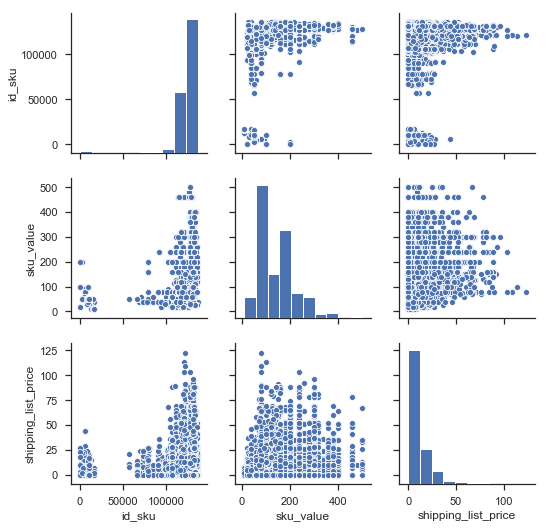

In [49]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df.iloc[:, 7:10])

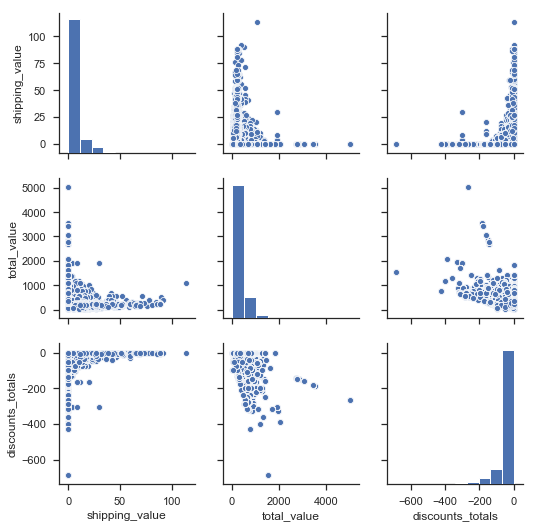

In [50]:
g = sns.pairplot(df.iloc[:, 10:])

## Cursory Analysis 
### Work in Progress

First we keep only seemingly crucial columns:

In [51]:
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,shipping_list_price,shipping_value,total_value,discounts_totals
0,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0
1,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,9.3,0.0,438.0,0.0
2,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0
3,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,116363,239.0,9.3,0.0,438.0,0.0
4,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Canceled,Visa,5,126755,199.0,9.3,0.0,438.0,0.0


In [52]:
print(list(df.columns))

['client_document', 'state', 'city', 'neighborhood', 'status', 'payment_system_name', 'installments', 'id_sku', 'sku_value', 'shipping_list_price', 'shipping_value', 'total_value', 'discounts_totals']


In [53]:
df['status'].value_counts()

df = df[df.status == 'Invoiced'].copy()

Invoiced              11888
Canceled               5575
Ready for shipping      376
Payment pending         111
Name: status, dtype: int64

In [54]:
df['status'].value_counts()

Invoiced    11888
Name: status, dtype: int64

In [55]:
df.payment_system_name.value_counts()

Mastercard          4639
Cash on delivery    3634
Visa                3237
American Express     191
Elo                  139
Vale                  37
Hipercard              9
Diners                 2
Name: payment_system_name, dtype: int64

In [56]:
df.state.value_counts()

RJ    7628
SP    1079
MG     750
ES     383
SE     270
PA     270
DF     228
BA     221
CE     166
PE     157
PR     115
RS     102
SC      99
MS      92
GO      89
PI      52
MA      35
MT      31
AM      29
RN      25
PB      25
AP      15
RO       9
AC       7
AL       6
TO       4
RR       1
Name: state, dtype: int64

In [57]:
df.city.value_counts().head(10)

Rio de Janeiro     4850
So Paulo            538
Nova Iguau          466
Niteri              443
Duque de Caxias     390
Aracaju             265
Belm                218
Braslia             215
Juiz de Fora        211
Belo Horizonte      174
Name: city, dtype: int64

In [58]:
df.city.nunique()

514

In [59]:
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,shipping_list_price,shipping_value,total_value,discounts_totals
9,X0AX9YK97K0,RJ,Rio de Janeiro,Campo Grande,Invoiced,Mastercard,4,123911,239.0,12.78,0.00,239.00,0.00
10,X0YKY79YK0K,MG,Carangola,santa maria,Invoiced,Mastercard,4,116363,239.0,41.35,0.00,239.00,0.00
16,YXYB0BA7AX,RJ,Rio de Janeiro,Barra da Tijuca,Invoiced,Cash on delivery,1,122520,199.0,9.98,0.00,189.05,-9.95
17,909888X7Y0,RJ,Rio de Janeiro,Campo Grande,Invoiced,Cash on delivery,1,115042,85.0,12.78,12.78,89.28,-8.50
18,XX7B8AX77BX,RJ,Rio de Janeiro,Piedade,Invoiced,Cash on delivery,1,117117,119.0,4.19,4.19,196.94,-45.40


In [60]:
df_str = df.iloc[:,:6]
df_str.head()

,client_document,state,city,neighborhood,status,payment_system_name
9,X0AX9YK97K0,RJ,Rio de Janeiro,Campo Grande,Invoiced,Mastercard
10,X0YKY79YK0K,MG,Carangola,santa maria,Invoiced,Mastercard
16,YXYB0BA7AX,RJ,Rio de Janeiro,Barra da Tijuca,Invoiced,Cash on delivery
17,909888X7Y0,RJ,Rio de Janeiro,Campo Grande,Invoiced,Cash on delivery
18,XX7B8AX77BX,RJ,Rio de Janeiro,Piedade,Invoiced,Cash on delivery


In [61]:
df_str = df_str.apply(lambda x: x.str.lower())

In [62]:
df = pd.concat([df_str, df.iloc[:,6:]], axis=1)

In [63]:
df.head()

,client_document,state,city,neighborhood,status,payment_system_name,installments,id_sku,sku_value,shipping_list_price,shipping_value,total_value,discounts_totals
9,x0ax9yk97k0,rj,rio de janeiro,campo grande,invoiced,mastercard,4,123911,239.0,12.78,0.00,239.00,0.00
10,x0yky79yk0k,mg,carangola,santa maria,invoiced,mastercard,4,116363,239.0,41.35,0.00,239.00,0.00
16,yxyb0ba7ax,rj,rio de janeiro,barra da tijuca,invoiced,cash on delivery,1,122520,199.0,9.98,0.00,189.05,-9.95
17,909888x7y0,rj,rio de janeiro,campo grande,invoiced,cash on delivery,1,115042,85.0,12.78,12.78,89.28,-8.50
18,xx7b8ax77bx,rj,rio de janeiro,piedade,invoiced,cash on delivery,1,117117,119.0,4.19,4.19,196.94,-45.40


In [64]:
df.city.nunique()
df.neighborhood.nunique()

488

1492

In [65]:
cols_to_keep = ['state', 'city', 'neighborhood', 
                'payment_system_name','total_value']

In [66]:
df.neighborhood.unique()

array(['campo grande', 'santa maria', 'barra da tijuca', ...,
       'sarinha alcntara', 'brasil', 'setor marista'], dtype=object)

In [67]:
df1 = df[cols_to_keep].copy()

In [68]:
df1.reset_index(inplace=True, drop=True)

In [69]:
df1.head()

,state,city,neighborhood,payment_system_name,total_value
0,rj,rio de janeiro,campo grande,mastercard,239.00
1,mg,carangola,santa maria,mastercard,239.00
2,rj,rio de janeiro,barra da tijuca,cash on delivery,189.05
3,rj,rio de janeiro,campo grande,cash on delivery,89.28
4,rj,rio de janeiro,piedade,cash on delivery,196.94


In [70]:
df1[['neighborhood', 'total_value']].head()

,neighborhood,total_value
0,campo grande,239.00
1,santa maria,239.00
2,barra da tijuca,189.05
3,campo grande,89.28
4,piedade,196.94


In [71]:
series_total_value = df1['total_value'].groupby(df['city']).sum()

In [72]:
df_total_value = series_total_value.to_frame()
df_total_value = df_total_value.sort_values(by='total_value', ascending=False)
df_total_value.head()

,total_value
city,
rio de janeiro,1095148.16
so paulo,134740.34
niteri,107649.85
nova iguau,94377.67
duque de caxias,79411.21


In [73]:
df_total_value['city'] = df_total_value.index

In [74]:
top_df_total_value = df_total_value.iloc[1:10,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a185b2630>]],
      dtype=object)

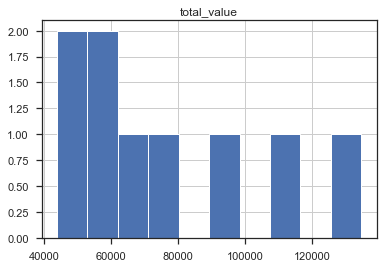

In [75]:
top_df_total_value.hist()